In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import umap
import warnings
warnings.filterwarnings("ignore")
# import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import scipy
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import DBSCAN

I chose a dataset of AirBNB data in NYC with the goal of seeing if room type can be a viable ground truth variable for dimensionality reduction/clsutering techniques.

In [2]:
df = pd.read_csv(r'C:\Users\Pat\Documents\Thinkful\Files\AB_NYC_2019.csv')

#Going to drop any rows with missing review data, as there is still plenty to work with
#and I'll be selecting only 10,000 rows anyway for timing reasons
df = df.dropna()
df = df.sample(n=10000, random_state=888)
df = df.reset_index()
print(df.head())

   index        id                                          name    host_id  \
0   3432   2057595            Great location in the East Village   10535464   
1   5253   3798941              Williamsburg Penthouse Guestroom    6642777   
2  21621  17339881                             Brownstone Studio  115854410   
3  37822  29943909  Cozy and spacious room in the heart of NYC❤️  168184878   
4  45607  34859742            Elegant 2 Bed.-10 min to Manhattan   10513282   

  host_name neighbourhood_group       neighbourhood  latitude  longitude  \
0     Steve           Manhattan        East Village  40.72829  -73.98907   
1    Martin            Brooklyn        Williamsburg  40.71231  -73.95313   
2  Michelle            Brooklyn  Bedford-Stuyvesant  40.68469  -73.94700   
3     Daria           Manhattan      Hell's Kitchen  40.76423  -73.98891   
4    Daniel              Queens    Ditmars Steinway  40.77530  -73.90994   

         room_type  price  minimum_nights  number_of_reviews last_re

In [3]:
df.shape

(10000, 17)

In [4]:
total_missing = df.isnull().sum().sort_values(ascending=False)
percent_missing = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
availability_365,0,0.0
latitude,0,0.0
id,0,0.0
name,0,0.0
host_id,0,0.0
host_name,0,0.0
neighbourhood_group,0,0.0
neighbourhood,0,0.0
longitude,0,0.0
calculated_host_listings_count,0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
index                             10000 non-null int64
id                                10000 non-null int64
name                              10000 non-null object
host_id                           10000 non-null int64
host_name                         10000 non-null object
neighbourhood_group               10000 non-null object
neighbourhood                     10000 non-null object
latitude                          10000 non-null float64
longitude                         10000 non-null float64
room_type                         10000 non-null object
price                             10000 non-null int64
minimum_nights                    10000 non-null int64
number_of_reviews                 10000 non-null int64
last_review                       10000 non-null object
reviews_per_month                 10000 non-null float64
calculated_host_listings_count    10000 non-null int64


In [11]:
features = ['price', 'number_of_reviews', 'minimum_nights', 'availability_365', 'reviews_per_month', 'calculated_host_listings_count']

X = df[features]
# y = df['neighbourhood_group']
y = df['room_type']

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [7]:
# nb = df['neighbourhood_group'].unique()
nb = df['room_type'].unique()
# colors = {nb[0]:"r",nb[1]:"b",nb[2]:"g",nb[3]:"c",nb[4]:"m"}
colors = {nb[0]:"r",nb[1]:"b",nb[2]:"g"}
print(nb)

['Private room' 'Entire home/apt' 'Shared room']


**PCA**

In [32]:
# We just want the first two principal components
pca = PCA(n_components=2)

# We get the components by 
# calling fit_transform method with our data
pca_components = pca.fit_transform(X_std)

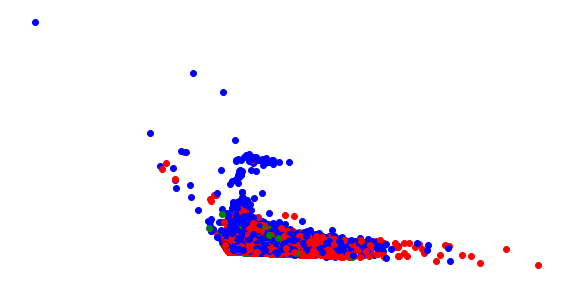

In [33]:
plt.figure(figsize=(10,5))

for i in range(pca_components.shape[0]):
    plt.scatter(pca_components[i, 0], pca_components[i, 1],
             color=colors[y[i]]
#              fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

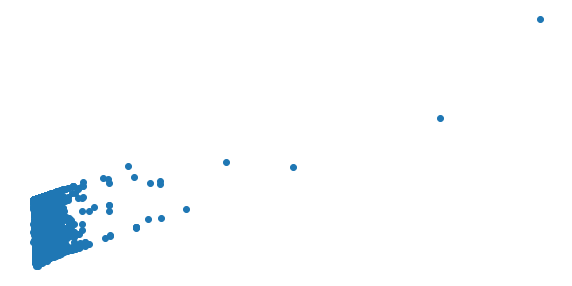

In [234]:
plt.figure(figsize=(10,5))
plt.scatter(pca_components[:, 0], pca_components[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

**t-SNE**

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.014s...
[t-SNE] Computed neighbors for 10000 samples in 1.240s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 3.841553
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.888390
[t-SNE] KL divergence after 300 iterations: 2.262995


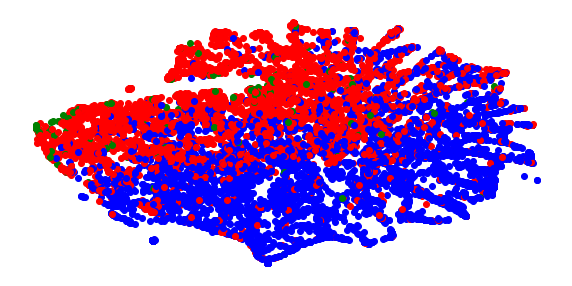

In [235]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)

plt.figure(figsize=(10,5))

for i in range(tsne_results.shape[0]):
    plt.scatter(tsne_results[i, 0], tsne_results[i, 1],
             color=colors[y[i]]
#              fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.019s...
[t-SNE] Computed neighbors for 10000 samples in 2.504s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 6.240998
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.974220
[t-SNE] KL divergence after 300 iterations: 1.659194


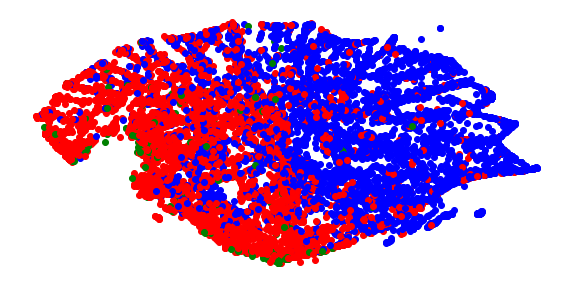

In [236]:
tsne = TSNE(n_components=2, verbose=1, perplexity=100, n_iter=300)
tsne_results = tsne.fit_transform(X)

plt.figure(figsize=(10,5))

for i in range(tsne_results.shape[0]):
    plt.scatter(tsne_results[i, 0], tsne_results[i, 1],
             color=colors[y[i]]
#              fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

[t-SNE] Computing 601 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.007s...
[t-SNE] Computed neighbors for 10000 samples in 2.050s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 8.814430
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.455280
[t-SNE] KL divergence after 300 iterations: 1.244899


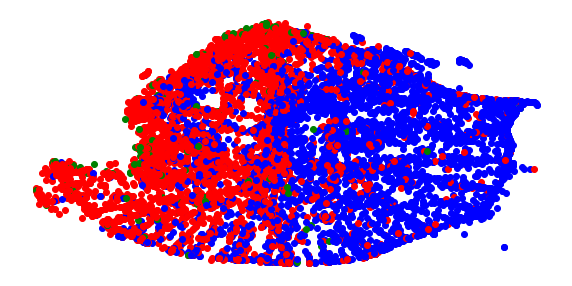

In [237]:
tsne = TSNE(n_components=2, verbose=1, perplexity=200, n_iter=300)
tsne_results = tsne.fit_transform(X)

plt.figure(figsize=(10,5))

for i in range(tsne_results.shape[0]):
    plt.scatter(tsne_results[i, 0], tsne_results[i, 1],
             color=colors[y[i]]
#              fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

[t-SNE] Computing 451 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.011s...
[t-SNE] Computed neighbors for 10000 samples in 1.541s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 7.634570
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.368252
[t-SNE] KL divergence after 500 iterations: 0.809452


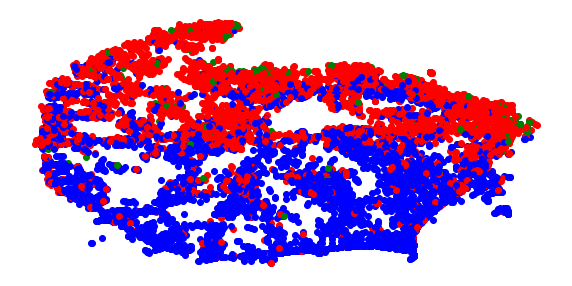

In [8]:
#SELECTED METHOD

tsne_selected = TSNE(n_components=2, verbose=1, perplexity=150, n_iter=500)
tsne_results_selected = tsne_selected.fit_transform(X)

plt.figure(figsize=(10,5))

for i in range(tsne_results_selected.shape[0]):
    plt.scatter(tsne_results_selected[i, 0], tsne_results_selected[i, 1],
             color=colors[y[i]]
#              fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.006s...
[t-SNE] Computed neighbors for 10000 samples in 0.364s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.984600
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.368507
[t-SNE] KL divergence after 300 iterations: 2.615613


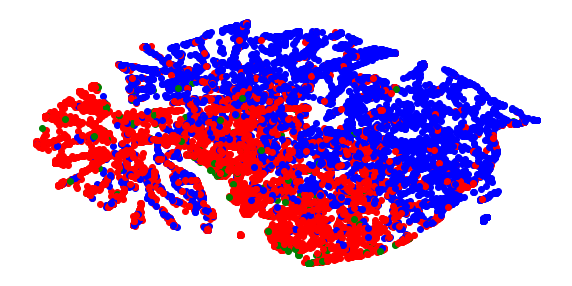

In [239]:
tsne = TSNE(n_components=2, verbose=1, perplexity=25, n_iter=300)
tsne_results = tsne.fit_transform(X)

plt.figure(figsize=(10,5))

for i in range(tsne_results.shape[0]):
    plt.scatter(tsne_results[i, 0], tsne_results[i, 1],
             color=colors[y[i]]
#              fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.008s...
[t-SNE] Computed neighbors for 10000 samples in 0.385s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.984600
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.148529
[t-SNE] KL divergence after 500 iterations: 1.310715


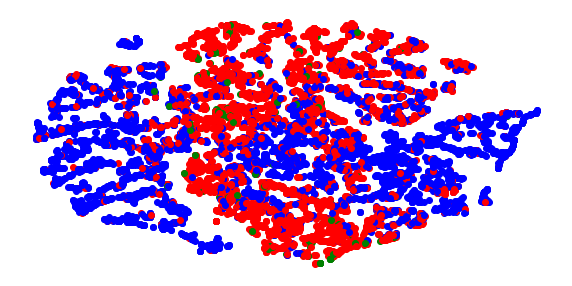

In [240]:
tsne = TSNE(n_components=2, verbose=1, perplexity=25, n_iter=500)
tsne_results = tsne.fit_transform(X)

plt.figure(figsize=(10,5))

for i in range(tsne_results.shape[0]):
    plt.scatter(tsne_results[i, 0], tsne_results[i, 1],
             color=colors[y[i]]
#              fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

[t-SNE] Computing 106 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.006s...
[t-SNE] Computed neighbors for 10000 samples in 0.475s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 3.571654
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.772789
[t-SNE] KL divergence after 300 iterations: 2.356058


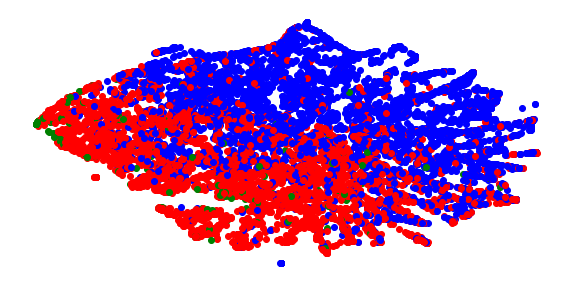

In [241]:
tsne = TSNE(n_components=2, verbose=1, perplexity=35, n_iter=300)
tsne_results = tsne.fit_transform(X)

plt.figure(figsize=(10,5))

for i in range(tsne_results.shape[0]):
    plt.scatter(tsne_results[i, 0], tsne_results[i, 1],
             color=colors[y[i]]
#              fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

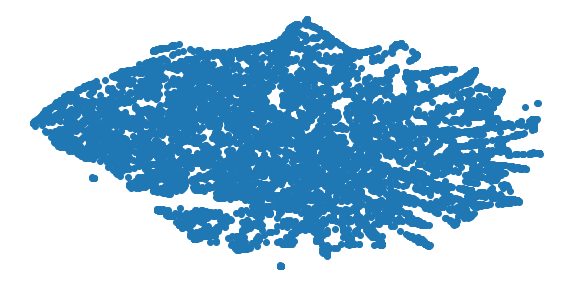

In [242]:
plt.figure(figsize=(10,5))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

**UMAP**

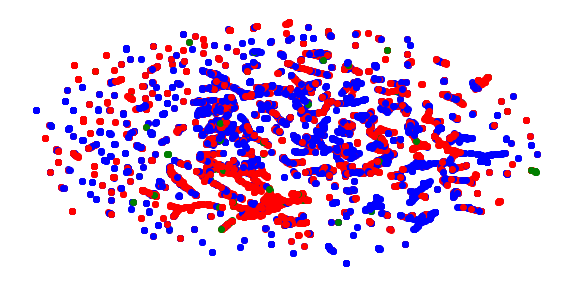

In [243]:
umap_results = umap.UMAP(n_neighbors=3,
                      min_dist=0.1,
                      metric='correlation').fit_transform(X)

plt.figure(figsize=(10,5))

for i in range(umap_results.shape[0]):
    plt.scatter(umap_results[i, 0], umap_results[i, 1],
             color=colors[y[i]]
#              fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

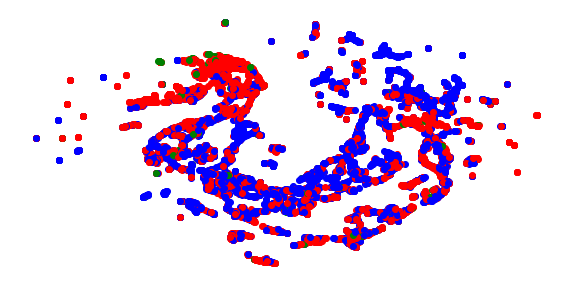

In [244]:
umap_results = umap.UMAP(n_neighbors=5,
                      min_dist=0.1,
                      metric='correlation').fit_transform(X)

plt.figure(figsize=(10,5))

for i in range(umap_results.shape[0]):
    plt.scatter(umap_results[i, 0], umap_results[i, 1],
             color=colors[y[i]]
#              fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

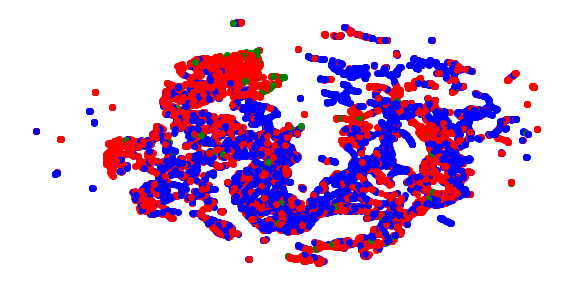

In [245]:
umap_results = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X)

plt.figure(figsize=(10,5))

for i in range(umap_results.shape[0]):
    plt.scatter(umap_results[i, 0], umap_results[i, 1],
             color=colors[y[i]]
#              fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

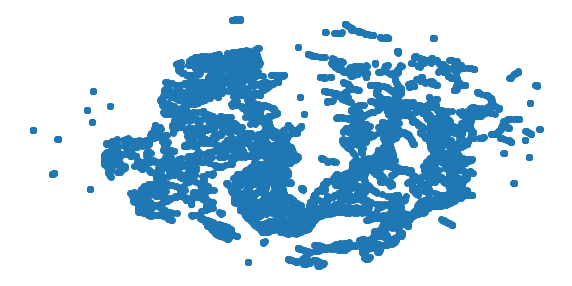

In [246]:
plt.figure(figsize=(10,5))
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

This data is either not easliy reduced in dimensionality or I just counld't find the right technique and/or parameters. Regardless, I chose one of the t-SNE methods (tsne_results)

**K-means**

95.7 ms ± 3.36 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


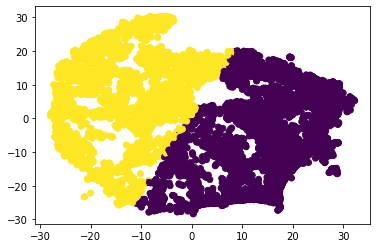

In [12]:
k_means = KMeans(n_clusters=2)
%timeit k_means.fit(tsne_results_selected)
y_pred = k_means.predict(tsne_results_selected)

# Plot the solution.
plt.scatter(tsne_results_selected[:,0], tsne_results_selected[:,1], c=y_pred)
plt.show()

**DBSCAN**

103 ms ± 1.47 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


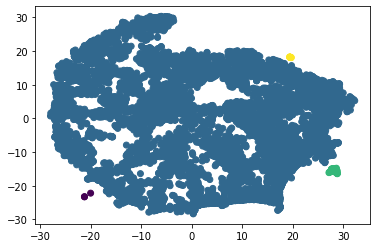

In [14]:
dbscan_cluster = DBSCAN(eps=2, min_samples=5)
%timeit dbscan_cluster.fit(tsne_results_selected)
y_pred = dbscan_cluster.fit_predict(tsne_results_selected)

# Plot the solution.
plt.scatter(tsne_results_selected[:,0], tsne_results_selected[:,1], c=y_pred)
plt.show()

I ended up choosing the T-SNE for reducing the dimensions and K-means for clustering the data. It seems like this Airbnb Data is pretty hard to cluster, at least after dimensionality reduction. In general though, reducing dimensions can have two benefits... making a perform more quickly (or at all if you have enough dimensions), or making it possible to represent teh data in two dimensions for visualization. The target variable used as the ground truth may or may not be what the clustering algorythm ends up finding, it may be the case that it finds a way of separating the data that you hadn't thought of.